# Bayesian AB Testing Part 1 - Congugate Method

In [234]:
library(dplyr)

In [74]:
# Create some fake data 
set.seed(2021)

n = 120

p_a = 0.29
p_b = 0.5

groupA = rbinom(n = n, size = 1, prob = p_a)
groupB = rbinom(n = n, size = 1, prob = p_b)

x_a = sum(groupA)
x_b = sum(groupB)

data = data.frame(group = rep(c('A', 'B'), each = n), outcome = c(groupA, groupB))

In [113]:
data %>% 
    group_by(group) %>% 
    summarize(n = n(),  convert = sum(outcome)) %>%
    mutate(p = convert/n)

`summarise()` ungrouping output (override with `.groups` argument)



group,n,convert,p
<chr>,<int>,<int>,<dbl>
A,120,36,0.3000000
B,120,49,0.4083333


The likelihood is binomial $ X_i, \dots, X_n \sim Bin(\theta)$ 

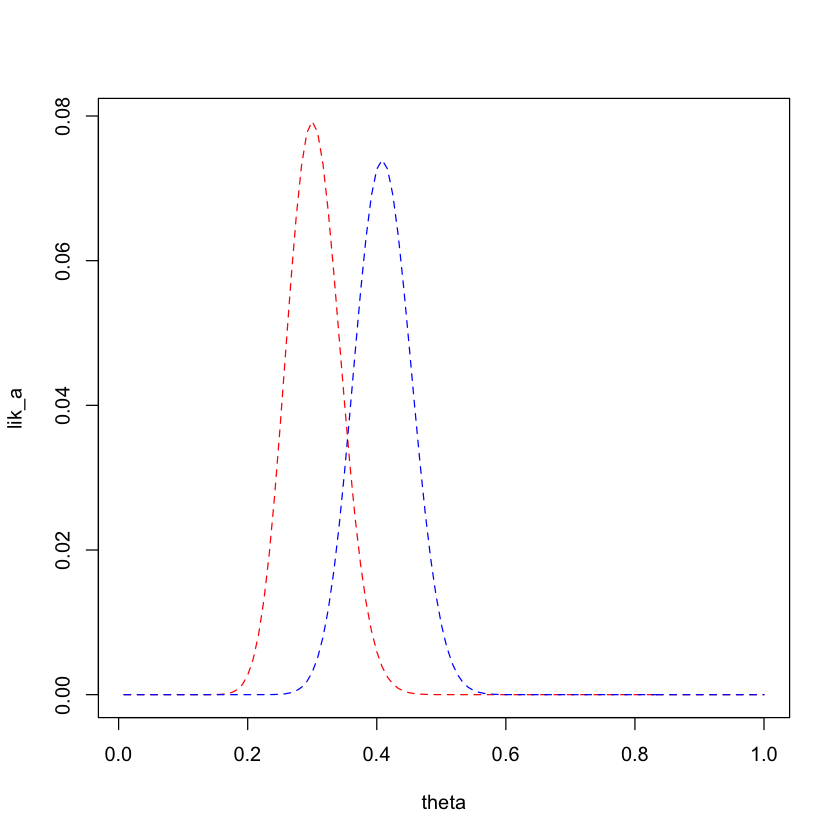

In [233]:
# Example 1 uniform prior

theta = 1:n/n

lik_a = dbinom(x = x_a, n, prob = theta)
lik_b = dbinom(x = x_b, n, prob = theta)

plot(theta, lik_a, type = 'l', col = 'red', lty = 2)
lines(theta, lik_b, col = 'blue', lty = 2)

#prior = rep(1/n, n)
#lines(theta, prior, type = 'l')

# We can treat this like a large bays box
#head(cbind(theta, prior, likelihood = lik_a, prior_x_lik = prior*lik_a,  posterior = prior*lik_a/sum(prior*lik_a)))

#post_a = (prior*lik_a)/sum(prior*lik_a)
#post_b = (prior*lik_b)/sum(prior*lik_b)

#lines(theta, post_a, col = 'red')
#lines(theta, post_b, col = 'blue')

The prior is $\theta | \alpha, \beta \sim Beta(\alpha, \beta)$ 

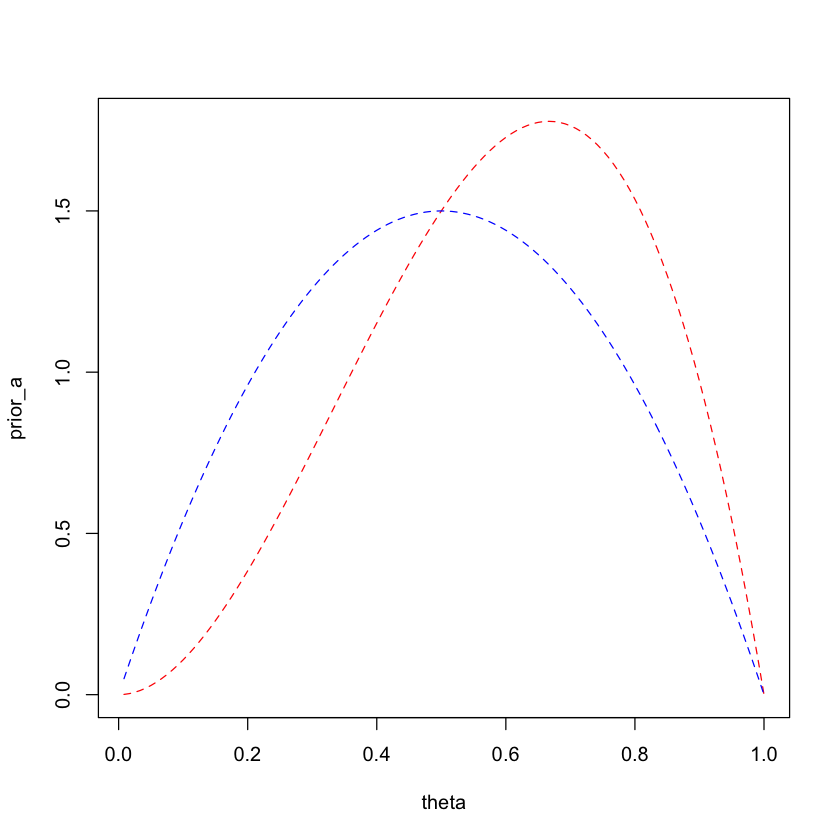

In [222]:
# Example 2 - Conguate Beta prior

alpha_a = 3
alpha_b = 2

beta = 2

prior_a = dbeta(x = theta, alpha_a, beta)
prior_b = dbeta(x = theta, alpha_b, beta)

plot(theta, prior_a, type = 'l', col = 'red', lty = 2)
lines(theta, prior_b, type = 'l', col = 'blue', lty = 2)

The posterior is just Beta again $\theta|x \sim Beta(\alpha^\prime, \beta^\prime)$

where $\alpha^\prime = \alpha + \sum x_i$ and $\beta^\prime = \beta + n - \sum x_i$ 

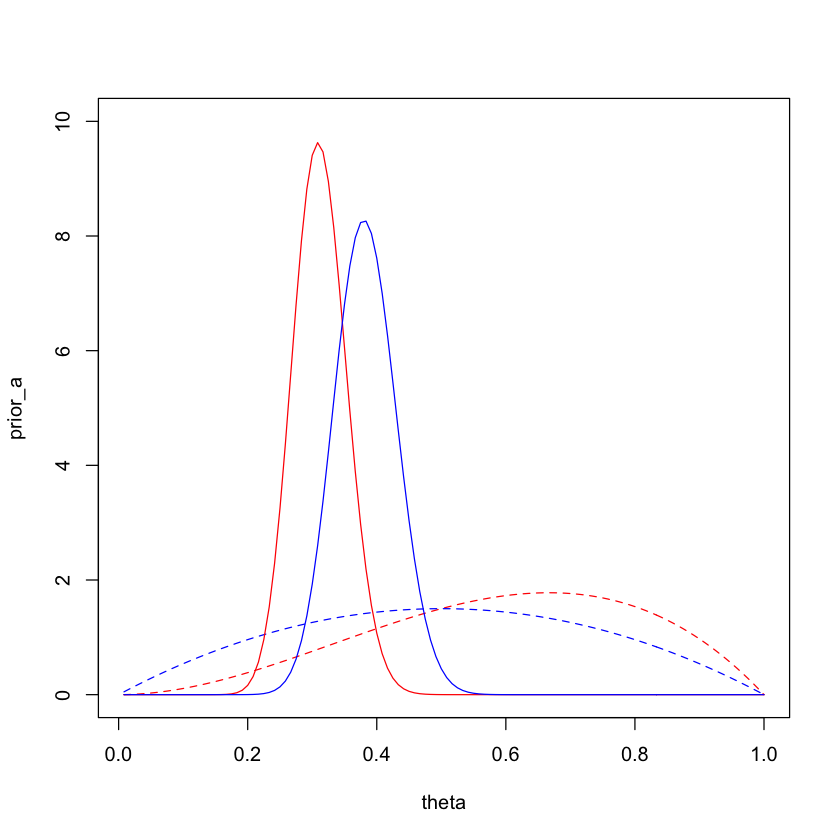

In [224]:
plot(theta, prior_a, type = 'l', col = 'red', lty = 2, ylim = c(0,10))
lines(theta, prior_b, type = 'l', col = 'blue', lty = 2)

alpha_a_ = alpha_a + x_a 
alpha_b_ = alpha_b + x_a

beta_a_ = beta + (n_a - x_a)
beta_b_ = beta +(n_b - x_b)

post_a = dbeta(x = theta, alpha_a_, beta_a_)
post_b = dbeta(x = theta, alpha_a_, beta_b_)

lines(theta, post_a, col = 'red', type = 'l')
lines(theta, post_b, col = 'blue')